In [2]:
#predict whether a passenger survived or not based on their age, gender, class of ticket, etc.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [3]:
# Load the Titanic dataset
data = pd.read_csv('Titanic_Train_Dataset.csv')

In [4]:
# Drop irrelevant features
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)


In [16]:
# Load the Titanic dataset
data = pd.read_csv('Titanic_Train_Dataset.csv')
 
print(data.head(15))
 
data.dtypes

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Fill missing values in 'Age' column with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [6]:
# Convert 'Sex' feature to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [7]:
# Create feature and target arrays
X = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the model using Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [11]:
# Calculate the precision score
precision = precision_score(y_test, y_pred)


In [12]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7541899441340782
Precision: 0.7027027027027027
Recall: 0.7027027027027027
F1 score: 0.7027027027027027


<AxesSubplot:xlabel='Age'>

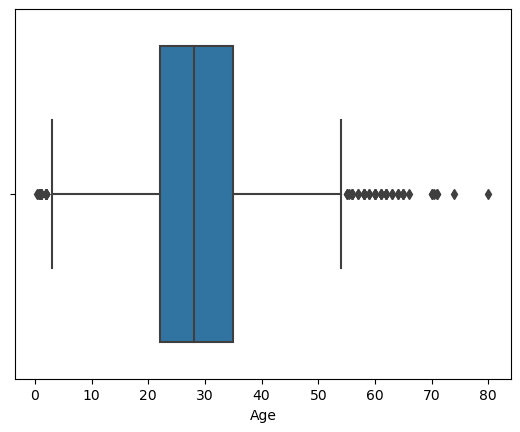

In [14]:
# Create a boxplot of the 'Age' feature
sns.boxplot(x=data['Age'])

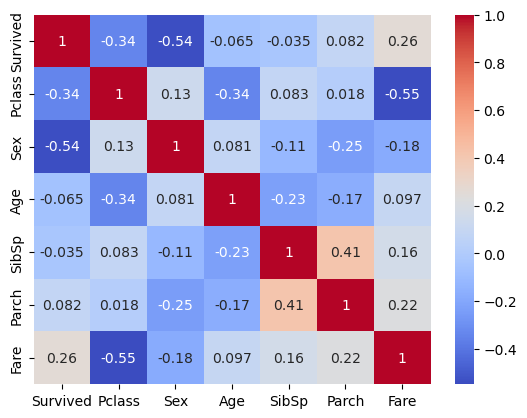

In [15]:
# Visualize the correlation between features
dataplot = sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
